In [1]:
import pandas as pd
import matplotlib.pyplot as plt
all_data_test = pd.read_csv('all_data_test.csv', index_col=0)
PM25_test = pd.read_csv('PM25_test.csv', index_col=0)
model_data_test = pd.concat([all_data_test, PM25_test], axis=1)
model_data_test = model_data_test.rename(columns={model_data_test.columns[-1]: "PM2.5"})
model_data_test

,stacja,rok,miesiąc,dzień,temperatura,suma opadów,wilgotność,prędkość wiatru,zachmurzenine,day_number_in_year,PM2.5
3895,KRAKÓW-OBSERWATORIUM,2023,9,1,16.6,24.7,70.8,1.7,4.3,244,9.1
3896,KRAKÓW-OBSERWATORIUM,2023,9,2,18.5,5.7,86.8,1.0,6.7,245,10.3
3897,KRAKÓW-OBSERWATORIUM,2023,9,3,17.5,1.6,80.5,1.0,5.7,246,12.4
3898,KRAKÓW-OBSERWATORIUM,2023,9,4,16.5,0.0,79.8,1.3,4.0,247,12.5
3899,KRAKÓW-OBSERWATORIUM,2023,9,5,16.6,0.0,72.3,1.0,1.0,248,15.8
3900,KRAKÓW-OBSERWATORIUM,2023,9,6,16.7,0.0,75.8,1.0,0.0,249,17.8
3901,KRAKÓW-OBSERWATORIUM,2023,9,7,17.2,0.0,79.5,1.3,1.0,250,23.0
3902,KRAKÓW-OBSERWATORIUM,2023,9,8,18.5,0.0,80.0,1.3,1.0,251,21.4
3903,KRAKÓW-OBSERWATORIUM,2023,9,9,18.5,0.0,78.8,1.0,3.7,252,24.0
3904,KRAKÓW-OBSERWATORIUM,2023,9,10,20.2,0.0,76.8,1.0,0.7,253,22.5


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
all_data = pd.read_csv('all_data.csv', index_col=0)
PM25 = pd.read_csv('PM25.csv', index_col=0)
model_data = all_data = pd.concat([all_data, PM25], axis=1)
model_data = model_data.rename(columns={model_data.columns[-1]: "PM2.5"})
model_data

,stacja,rok,miesiąc,dzień,temperatura,suma opadów,wilgotność,prędkość wiatru,zachmurzenine,day_number_in_year,PM2.5
0,KRAKÓW-OBSERWATORIUM,2014,1,1,0.3,0.0,94.5,0.7,7.3,1,94.0
1,KRAKÓW-OBSERWATORIUM,2014,1,2,-1.5,0.0,89.5,1.0,4.3,2,135.0
2,KRAKÓW-OBSERWATORIUM,2014,1,3,2.0,0.0,88.5,0.3,1.7,3,172.0
3,KRAKÓW-OBSERWATORIUM,2014,1,4,2.7,1.7,88.5,0.3,6.0,4,135.0
4,KRAKÓW-OBSERWATORIUM,2014,1,5,7.0,0.9,87.8,0.7,7.0,5,68.0
...,...,...,...,...,...,...,...,...,...,...,...
3525,KRAKÓW-OBSERWATORIUM,2023,8,27,22.2,0.5,85.3,0.7,3.7,239,9.9
3526,KRAKÓW-OBSERWATORIUM,2023,8,28,19.7,0.1,89.5,1.7,8.0,240,8.4
3527,KRAKÓW-OBSERWATORIUM,2023,8,29,21.0,0.9,89.0,1.0,7.7,241,10.2
3528,KRAKÓW-OBSERWATORIUM,2023,8,30,18.5,0.3,89.5,1.3,7.7,242,8.4


In [2]:
model_data_test.to_csv("model_data_test.csv")

In [59]:
print(model_data["PM2.5"].isna().sum())
model_data = model_data.dropna(subset=["PM2.5"])
print(model_data["PM2.5"].isna().sum())

43
0


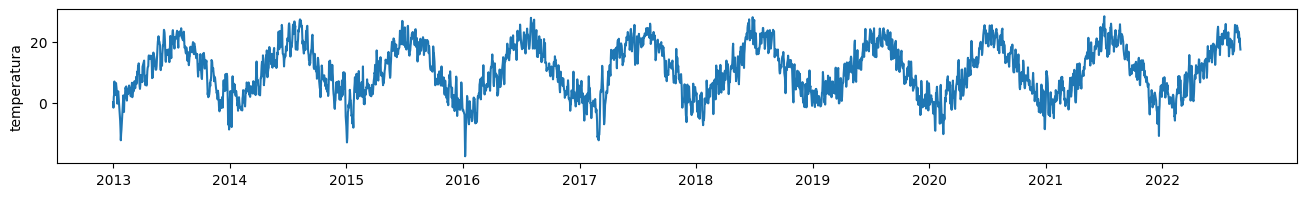

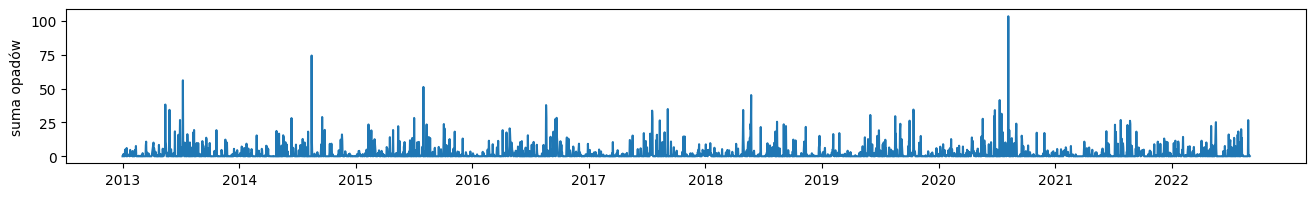

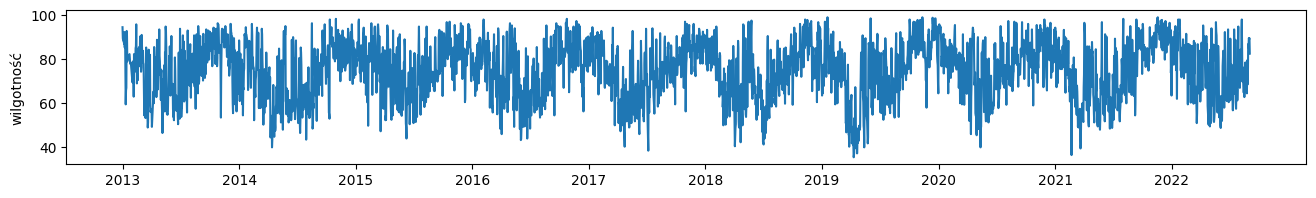

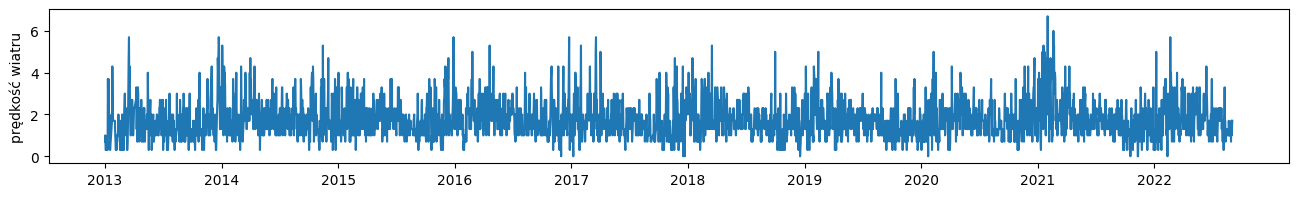

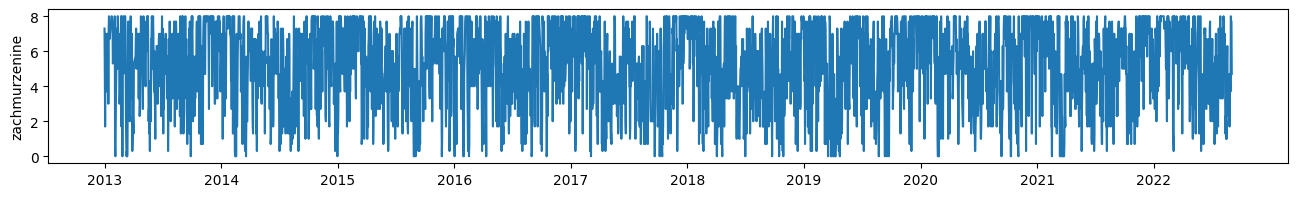

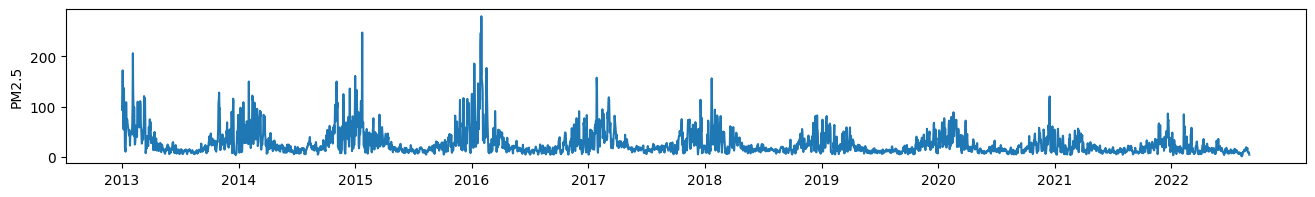

In [76]:
import matplotlib.pyplot as plt
import numpy as np

first_day_of_month = np.array([0,365,730,1095, 1460,1825,2190,2555,2920,3285]) # First day of each month
my_xticks = ['2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']

plt.figure(figsize=[16,2])
plt.plot(model_data.index,model_data["temperatura"])
plt.xticks(first_day_of_month, my_xticks)
plt.ylabel("temperatura")
plt.show()

plt.figure(figsize=[16,2])
plt.plot(model_data.index,model_data["suma opadów"])
plt.xticks(first_day_of_month, my_xticks)
plt.ylabel("suma opadów")
plt.show()

plt.figure(figsize=[16,2])
plt.plot(model_data.index,model_data["wilgotność"])
plt.xticks(first_day_of_month, my_xticks)
plt.ylabel("wilgotność")
plt.show()

plt.figure(figsize=[16,2])
plt.plot(model_data.index,model_data["prędkość wiatru"])
plt.xticks(first_day_of_month, my_xticks)
plt.ylabel("prędkość wiatru")
plt.show()

plt.figure(figsize=[16,2])
plt.plot(model_data.index,model_data["zachmurzenine"])
plt.xticks(first_day_of_month, my_xticks)
plt.ylabel("zachmurzenine")
plt.show()

plt.figure(figsize=[16,2])
plt.plot(model_data.index,model_data["PM2.5"])
plt.xticks(first_day_of_month, my_xticks)
plt.ylabel("PM2.5")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame()
columns_to_standardize =  ["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine","day_number_in_year", "PM2.5"]
scaled_data[columns_to_standardize] = scaler.fit_transform(model_data[columns_to_standardize])
scaled_data

In [ ]:
plt.figure(figsize=(12, 6)) 



x = range(len(scaled_data))
y1 = scaled_data['temperatura'][:30]
y2 = scaled_data['suma opadów'][:30]
y3 = scaled_data['wilgotność'][:30]
y4 = scaled_data['prędkość wiatru'][:30]
y5 = scaled_data['zachmurzenine'][:30]
y6 = scaled_data['PM2.5'][:30]


plt.plot(x[:30], y1, label='Temperatura')
plt.plot(x[:30], y2, label='Ciśnienie')
plt.plot(x[:30], y3, label='Zachmurzenie')
plt.plot(x[:30], y4, label='Wilgotność')
plt.plot(x[:30], y5, label='PM2.5')
plt.plot(x[:30], y6, label='Opady')


plt.xlabel('dni')
plt.ylabel('pogoda')
plt.title('Wykres pogody')
plt.legend()
plt.grid()
plt.show()

In [ ]:
columns = ["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine", "day_number_in_year"]
korelacja = model_data[columns + ["PM2.5"]].corr()
wynik = korelacja["PM2.5"].sort_values(ascending=False)
print(wynik)

In [ ]:
model_data.to_csv("model_data.csv")